In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,recall_score,f1_score,precision_score

In [ ]:
data=pd.read_csv(r'B:\practice\housing.csv')
data.head()

In [5]:
data.shape

(21613, 21)

In [7]:
data.shape[0]

21613

In [8]:
data.shape[1]

21

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  int64  
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [12]:
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [14]:
data.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [ ]:
data.filna(data.mean())  ## whole table 

In [16]:
data['date']= data['date'].fillna(data['date'].data.meadian())  -## perticular coulmn filling

C:\Users\mbrbh\AppData\Local\Temp\ipykernel_12120\3231489778.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.fillna(data.mean())


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [17]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


## EDA
 # 1. Univarieant 
 # 2. Bivariant

## how to identify whether it's a class imbalance or not 

data['target columns name'].value_counts()

In [18]:
data['price'].value_counts()     # identifying the class imbalance

450000    172
350000    172
550000    159
500000    152
425000    150
         ... 
954500      1
355200      1
526750      1
278100      1
402101      1
Name: price, Length: 4032, dtype: int64

In [19]:
data['price'].value_counts(normalize=True)  # identifying the class imbalance in percentage

450000    0.007958
350000    0.007958
550000    0.007357
500000    0.007033
425000    0.006940
            ...   
954500    0.000046
355200    0.000046
526750    0.000046
278100    0.000046
402101    0.000046
Name: price, Length: 4032, dtype: float64

#2.Bivariant analysis

In [20]:
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

<AxesSubplot:xlabel='floors', ylabel='condition'>

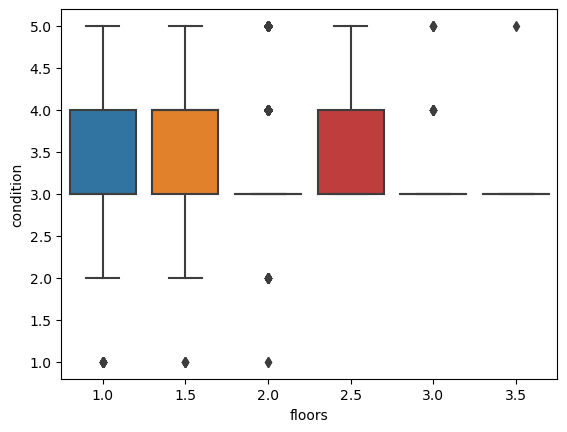

In [3]:
sns.boxplot(x='floors',y='condition',data=data)

In [9]:
data=data.drop(columns=['bedrooms', 'bathrooms', 'sqft_living','sqft_lot', 'floors', 'waterfront','view', 'condition', 'grade','sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode','lat', 'long', 'sqft_living15', 'sqft_lot15'], axis=1)

KeyError: "['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15'] not found in axis"

In [14]:
data.head()

,id,date,price
0,7129300520,20141013T000000,221900
1,6414100192,20141209T000000,538000
2,5631500400,20150225T000000,180000
3,2487200875,20141209T000000,604000
4,1954400510,20150218T000000,510000


In [21]:
final= pd.get_dummies (data,columns=['id', 'date', 'price'])
data

,id,date,price
0,7129300520,20141013T000000,221900
1,6414100192,20141209T000000,538000
2,5631500400,20150225T000000,180000
3,2487200875,20141209T000000,604000
4,1954400510,20150218T000000,510000
...,...,...,...
21608,263000018,20140521T000000,360000
21609,6600060120,20150223T000000,400000
21610,1523300141,20140623T000000,402101
21611,291310100,20150116T000000,400000


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [27]:
data.head()

,id,date,price
0,7129300520,20141013T000000,221900
1,6414100192,20141209T000000,538000
2,5631500400,20150225T000000,180000
3,2487200875,20141209T000000,604000
4,1954400510,20150218T000000,510000


In [36]:
y=data['price']
x=data.drop(columns=['price','date'],axis=1)

In [37]:
x

,id
0,7129300520
1,6414100192
2,5631500400
3,2487200875
4,1954400510
...,...
21608,263000018
21609,6600060120
21610,1523300141
21611,291310100


In [38]:
y

0        221900
1        538000
2        180000
3        604000
4        510000
          ...  
21608    360000
21609    400000
21610    402101
21611    400000
21612    325000
Name: price, Length: 21613, dtype: int64

## ML Models:- splitting data and prediction

In [39]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=30,random_state = 43)

In [40]:
lgr=LogisticRegression()

In [ ]:
lgr.fit(x_train,y_train)

In [ ]:
pred_lgr=lgr.predict(x_test)

In [ ]:
pred_lgr

## Evaluate the model:-

In [ ]:
from sklearn.metrics import confusion_matrix,recall_score,f1_score,precision_score

In [ ]:
cm = confusion_matrix(y_test,pred_lgr)
cm

In [ ]:
from sklearn.metrics import plot_confusion_matrix

In [ ]:
plot_confusion_matrix(lgr,x_test,y_test)
plt.show()

In [ ]:
recall=recall_score(y_test,pred_lgr)

In [ ]:
flscore = f1_score(y_test,pred_lgr)

In [ ]:
precision=precision_score(y_test,pred_lgr)